# HeatMap for WoW Token Prices

Map all of the available data in the JSON available from https://wowtoken.info/ for each region to view the data by timeslots for each day of the week

**All times are in UTC**

In [2]:
#!/usr/bin/env python

%pylab inline

import json
import datetime
import time
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from urllib2 import urlopen
from matplotlib import cm


# Test data URL
# _TOKEN_DATA_URL = 'https://github.com/kxseven/wow-token-price-heatmap/master/testdata/wowtoken.json'

# LIVE URL
_TOKEN_DATA_URL = 'https://wowtoken.info/wowtoken.json'


def get_date_ticks(interval):
    """Return a list of interval matplotlib dates between 00:00 and 23:59:59"""
    start = datetime.datetime(1900, 1, 1, 0, 0, 0)
    increment = 86400/interval
    date_ticks = [mdates.date2num(start + datetime.timedelta(seconds=(x * increment))) for x in range(0, interval)]
    return date_ticks


# From http://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script
def get_jsonparsed_data(url):
    """Receive the content of ``url``, parse it as JSON and return the object"""
    response = urlopen(url)
    data = str(response.read())
    return json.loads(data)


def get_regional_pricemap(history, region):
    """Build a HexBin heapmap for prices in a given region"""
    region_history = history[region]

    chart_data = [[time.strftime("%R", time.gmtime(x)), y, x] for [x, y] in region_history]
    chart_data = [[datetime.datetime.strptime(a, '%H:%M'), a, b, c] for [a, b, c] in chart_data]
    chart_data = [[mdates.date2num(a), a, b, c, d] for [a, b, c, d] in chart_data]
    chart_data = [[a, b, c, d, e, datetime.date.fromtimestamp(e).weekday()] for [a, b, c, d, e] in chart_data]

    vs_times = [a for [a, b, c, d, e, f] in chart_data]
    vs_prices = [d for [a, b, c, d, e, f] in chart_data]
    vs_weekdays = [f for [a, b, c, d, e, f] in chart_data]

    fig, ax = plt.subplots(figsize=(16,5))

    plt.hexbin(vs_times, vs_weekdays, C=vs_prices, gridsize=(48,7), cmap=cm.jet, bins=None)

    cb = plt.colorbar()
    cb.set_label('Token Price')

    hour_formatter = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_locator(mdates.MinuteLocator())
    ax.xaxis.set_major_formatter(hour_formatter)
    ax.xaxis.grid(True)
    ax.xaxis.set_ticks(get_date_ticks(24))
    ax.set_title('WoW Token Prices - Region: {}'.format(region))
    plt.xticks(rotation='vertical')
    plt.subplots_adjust(bottom=.3)
    plt.axis([min(vs_times), max(vs_times), -1, 7])
    plt.yticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))

    fig.savefig('wow_token_heatmap_{}.png'.format(region), bbox_inches='tight')


all_history = get_jsonparsed_data(_TOKEN_DATA_URL)['history']


Populating the interactive namespace from numpy and matplotlib


## European Realms

**All times are in UTC**

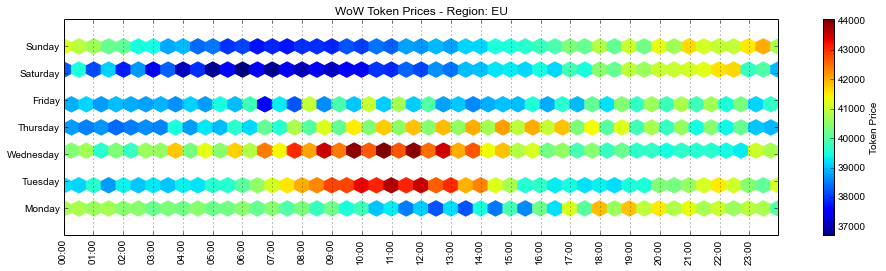

In [16]:
get_regional_pricemap(all_history, 'EU')

## North American Realms

**All times are in UTC**

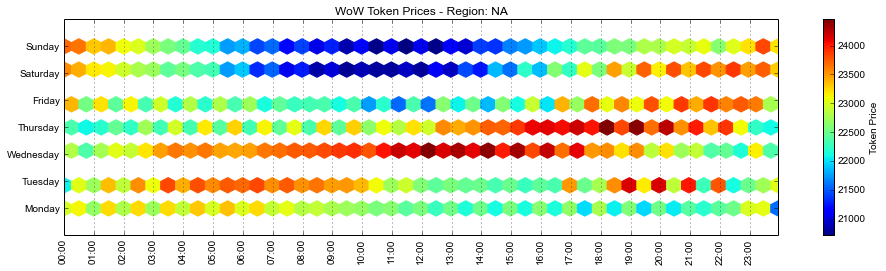

In [17]:
get_regional_pricemap(all_history, 'NA')

## Chinese Realms

**All times are in UTC**

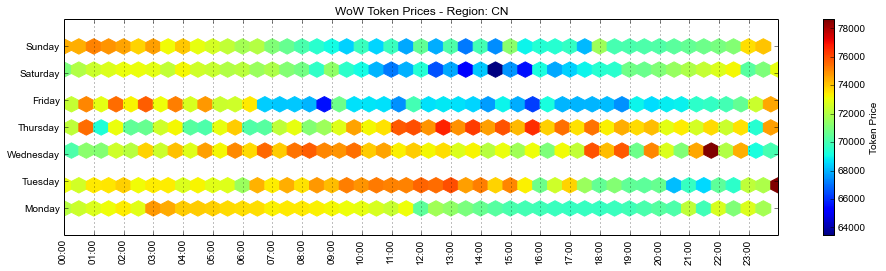

In [18]:
get_regional_pricemap(all_history, 'CN')

## Taiwanese Realms

**All times are in UTC**

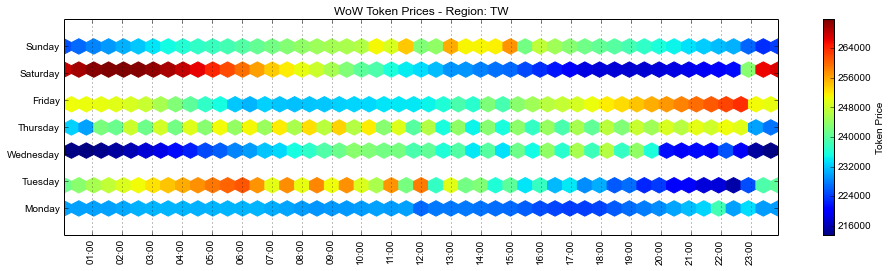

In [19]:
get_regional_pricemap(all_history, 'TW')

## Korean Realms

**All times are in UTC**

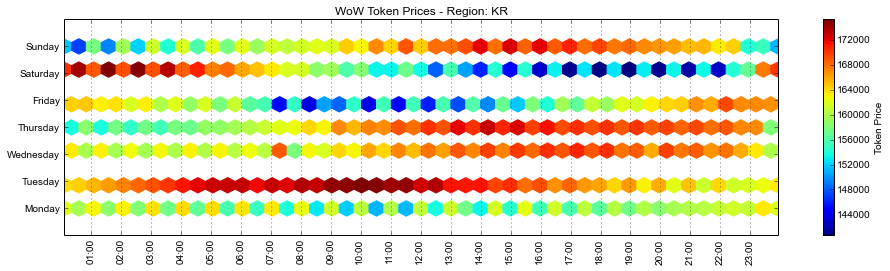

In [20]:
get_regional_pricemap(all_history, 'KR')